In [1]:
import h5py
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
with h5py.File("U_matrix", "r") as file:
    U = file["matrix"][:]
    
with h5py.File("V_matrix", "r") as file:
    V = file["matrix"][:]

with h5py.File("M_matrix", "r") as file:
    M = file["matrix"][:]
    
with h5py.File("xgrid_matrix", "r") as file:
    xgrid = file["matrix"][:]
    
with h5py.File("ygrid_matrix", "r") as file:
    ygrid = file["matrix"][:]

# Mean velocity development
absolut mean velocity over number of "cells"

In [184]:
total_t = np.shape(M)[0] 
mean_M = np.zeros(total_t) # The sum of absolut velocity/the number of "cells" (IA)
std_M = np.zeros(total_t)

for t in range(total_t):
    mean_M[t] = np.mean(M[t])
    std_M[t] = np.std(M[t])

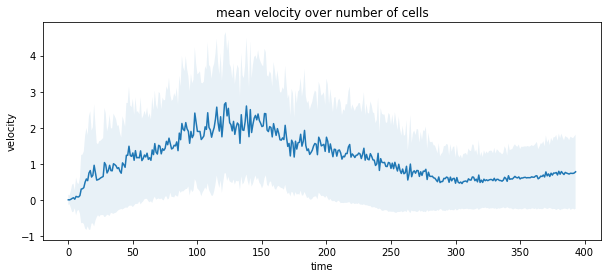

In [185]:
plt.figure(figsize=(10,4))
plt.title("mean velocity over number of cells")
# Mean over cell/IA number.
plt.plot(range(total_t), mean_M)
plt.fill_between(range(total_t), mean_M-std_M, mean_M+std_M, alpha=0.1)
plt.xlabel("time")
plt.ylabel("velocity")
plt.savefig("mean_vel_IA", dpi=300)
plt.show()

In [186]:
np.argmax(mean_M) # The time point of the maximal mean velocity of cells.

122

# Different representations of the arrows

## The original figure

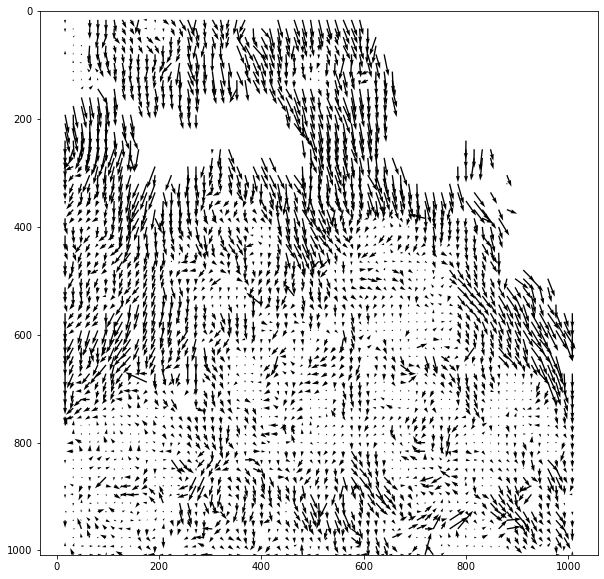

In [4]:
t = 150

plt.figure(figsize=(10, 10))
plt.quiver(xgrid[t], ygrid[t], V[t], -U[t], scale=150)
plt.ylim(max(ygrid[t][1]), 0)
plt.show()

## Coloring the arrows depending on the directions

In [5]:
import matplotlib.cm as cm
from matplotlib.colors import Normalize

Attention: the colormap will be considered as circular. The beginning and the end of the color map will be connected to each other --> the arrows that point up have color of the both ends of the colormap while the arrows that point down have color in the middle of the colormap.

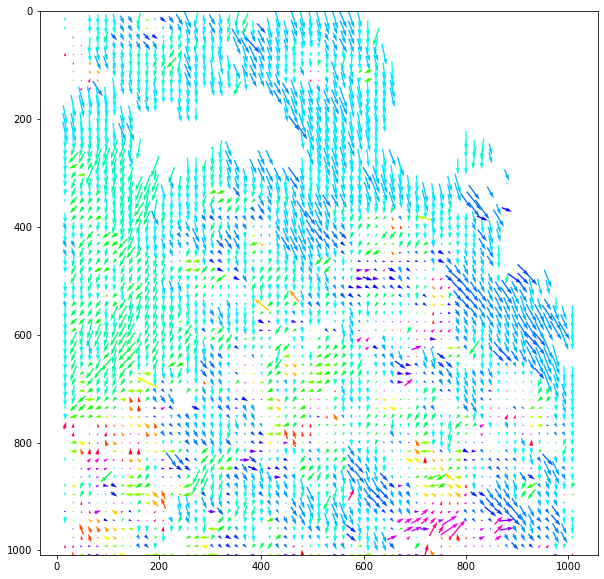

In [29]:
x = xgrid[t]
y = ygrid[t]
u = U[t]
v = V[t]
colors = np.arctan2(v, u)

norm = Normalize()
norm.autoscale(colors)
# we need to normalize our colors array to match it colormap domain
# which is [0, 1]

colormap = cm.inferno
# pick your colormap here, refer to 
# http://matplotlib.org/examples/color/colormaps_reference.html
# and
# http://matplotlib.org/users/colormaps.html
# for details
plt.figure(figsize=(10, 10))
plt.ylim(max(ygrid[t][1]), 0)
plt.quiver(x, y, v, -u, np.arctan2(v, u), pivot="mid",
        scale=150, cmap='hsv')
plt.savefig("color_hsv", dpi=300)
# Blue colors are pointed down. Red colors are pointed up.

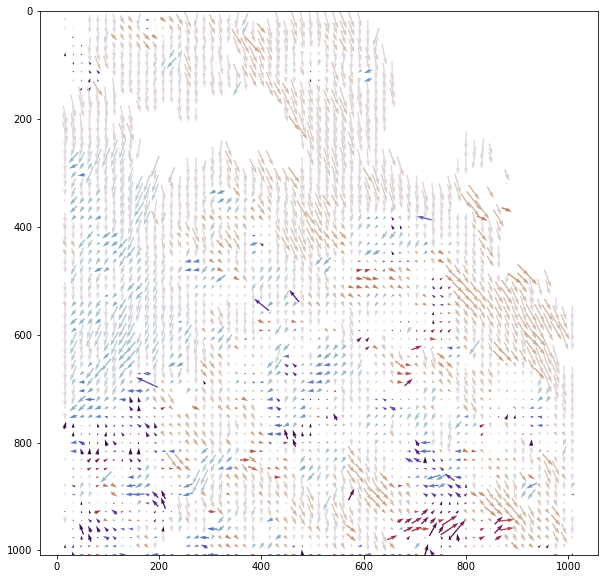

In [30]:
plt.figure(figsize=(10, 10))
plt.ylim(max(ygrid[t][1]), 0)
plt.quiver(x, y, v, -u, np.arctan2(v, u), pivot="mid",
        scale=150, cmap='twilight_shifted')
plt.savefig("color_twilight_shifted", dpi=300)
# Emphesize the cells that go up.

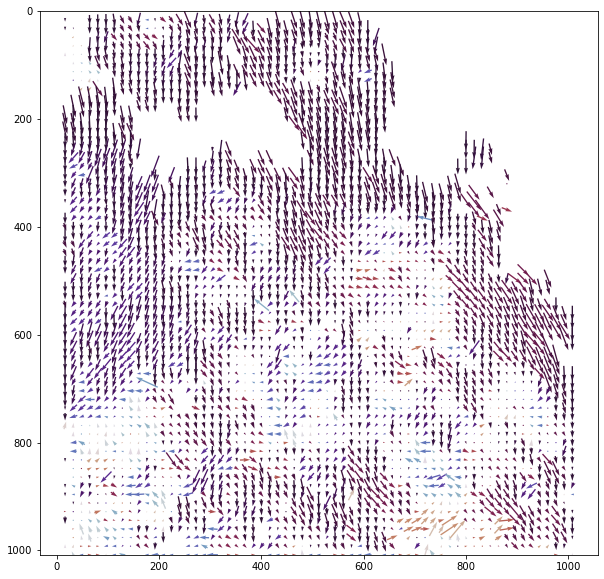

In [33]:
plt.figure(figsize=(10, 10))
plt.ylim(max(ygrid[t][1]), 0)
plt.quiver(x, y, v, -u, np.arctan2(v, u), pivot="mid",
        scale=150, cmap='twilight')
plt.savefig("color_twilight", dpi=300)
# Emphasize the cells are flow down.

## Coloring the arrows depending on the magnitude

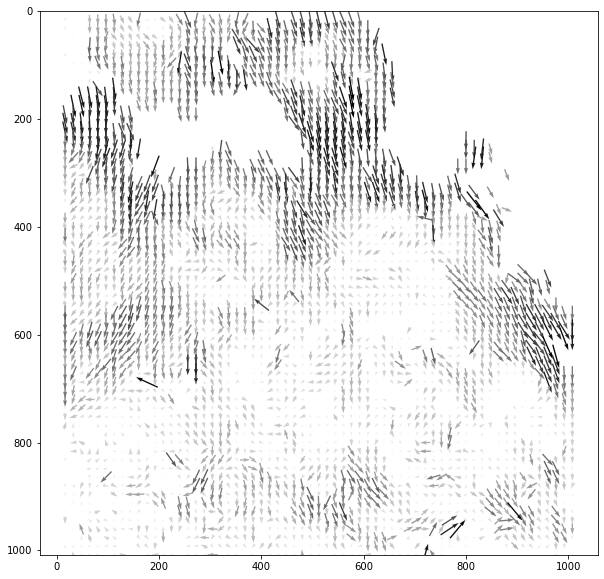

In [35]:
plt.figure(figsize=(10, 10))
plt.ylim(max(ygrid[t][1]), 0)
plt.quiver(x, y, v, -u, M[t], pivot="mid",
        scale=150, cmap='Greys')
plt.savefig("magnitude_grey", dpi=300)

## Contour plot depending on the magnitude

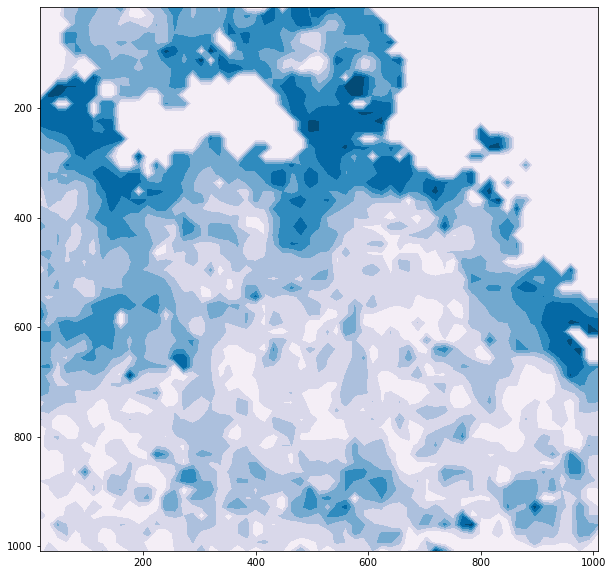

In [78]:
plt.figure(figsize=(10, 10))
plt.gca().invert_yaxis()
plt.contourf(xgrid[t], ygrid[t], M[t], cmap="PuBu")
plt.savefig("magnitude_contour_PuBu", dpi=300)

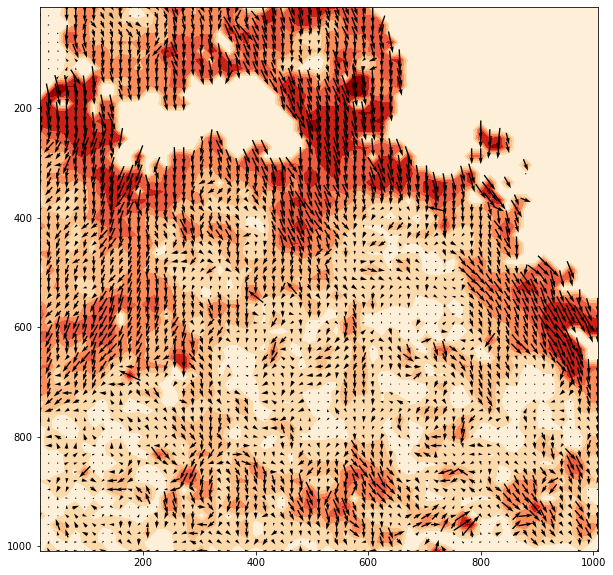

In [81]:
plt.figure(figsize=(10, 10))
plt.gca().invert_yaxis()
plt.contourf(xgrid[t], ygrid[t], M[t], cmap="OrRd")
plt.quiver(xgrid[t], ygrid[t], V[t], -U[t], 
           pivot="mid",scale=150)
plt.savefig("magnitude_contour_OrRd_witharrow", dpi=300)